# Day 13

- coordinates where dots are (binary mask in 2d array)
- folding instructions at the end (flip to nD-array and then sum bools along axis 3 to arrive at new binary mask)

## Part 1
- complete the first fold and count the dots (fold along x=655)

In [63]:
import re
import numpy as np

In [68]:
in_path = "data/day13.txt"

# regex to the rescue!
with open(in_path, "r") as in_file:
    point_list = re.findall('([0-9]+),([0-9]+)', in_file.read())  # nums separated by comma
    points = [[int(point[0]), int(point[1])] for point in point_list]
with open(in_path, "r") as in_file:
    fold_list = re.findall('([xy])=([0-9]+)', in_file.read())  # x or y and num combined by equal sign
    folds = [[str(fold[0]), int(fold[1])] for fold in fold_list]

In [80]:
# build empty array to fill binary point mask in
arr = np.zeros((10000, 10000), dtype=np.uint16)

for x, y in points:
    arr[y, x] = 1

In [81]:
# fold along x and y

for i, (ax, loc) in enumerate(folds):
    if ax == "x":
        # splice array along axis to fold location
        arr1 = arr[:,:loc]
        arr2 = arr[:,2*loc:loc:-1]  # "I put my thing down, flip it and reverse it"
    elif ax == "y":
        arr1 = arr[:loc,:]
        arr2 = arr[2*loc:loc:-1,:]
    
    arr = np.clip(arr1 + arr2, 0, 1)  # sum folded arrays, limit to binary mask again
    # print first fold but keep folding
    if i == 0:
        print("sum after first fold: ", np.sum(arr))

sum after first fold:  770


## Part 2

Print the array to see 8 capital letters that are the solution for part 2.

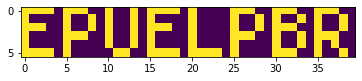

In [78]:
%matplotlib inline 

from matplotlib import pyplot as plt
plt.imshow(arr, interpolation='nearest')
plt.show()